In [519]:
# Download data
# Clean Data
# See the distribution, scale
# Try 3 methods : linear, Lasso, Knn, xgboost, compare the metrics, rmse, r2 score,

# Data Preprocessing

## Importing the libraries and dataset

In [520]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator)
import matplotlib.patches as mpatches
import datetime
from datetime import datetime, timedelta
from prophet import Prophet
from prophet.plot import plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visualization
sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline

random_state=42
random_seed = 42

In [521]:
data = "https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv"
df = pd.read_csv(data)
df.head(50)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,19.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,32.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,28.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,34.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,57.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2023,202306,NaN,60.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2023,202307,NaN,54.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2023,202308,NaN,44.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2023,202309,NaN,56.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2023,202310,NaN,49.0,NaN,NaN,NaN


## Data preprocessing and cleaning

### We need only first 5 columns. Let's drop the last four. And rename them.

In [522]:
df.drop(df.columns[-4:], axis = 1, inplace = True)

In [523]:
df.rename(columns = {"MONATSZAHL": "Category", "AUSPRAEGUNG": "Type", "JAHR": "Year", "MONAT": "Month", "WERT" : "Value"}, inplace = True)

In [524]:
df.head(5)

,Category,Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN


### We see the "Summe" values. Let's separate the rows with "Summe" to "df_summe data set"

In [525]:
df_summe = df[(df["Month"] == "Summe")].copy(deep=True)

In [526]:
df = df.drop(df[df["Month"] == "Summe"].index, axis = 0)

### Let's have a look if we have any missing data/ strange category names and duplicates.

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 2169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2016 non-null   object 
 1   Type      2016 non-null   object 
 2   Year      2016 non-null   int64  
 3   Month     2016 non-null   object 
 4   Value     1932 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 94.5+ KB


In [528]:
# Check duplicates
df[df.duplicated()]
# No duplicates

,Category,Type,Year,Month,Value


In [529]:
# Checking missing data
df.isnull().sum()

Category     0
Type         0
Year         0
Month        0
Value       84
dtype: int64

In [530]:
# Percent of missing data
missing_percent = df.isnull().sum().sum()/len(df)*100
missing_percent.round()

4.0

We have relatively big number of missing data. Let's check how it looks like.

In [531]:
df[df.Value.isnull()].describe()

,Year,Value
count,84.0,0.0
mean,2023.0,NaN
std,0.0,NaN
min,2023.0,NaN
25%,2023.0,NaN
50%,2023.0,NaN
75%,2023.0,NaN
max,2023.0,NaN


We see that missing values are for 2023 year. Each year contains 84 rows, It means that we have data with labels only until Year 2022. It doesn't make sense to fill  missing data. Let's drop it.

In [532]:
# Drop missing data
df.dropna(inplace = True)

We have 4 categorical variables: `Category`, `Type`, `Year` and `Month` . Let's check if there are some strange values.


In [533]:
df.describe(include = "object")

,Category,Type,Month
count,1932,1932,1932
unique,3,3,276
top,Verkehrsunfälle,insgesamt,202201
freq,828,828,7


The most frequent categories are "Verkehrsunfälle" for the Category and "insgesamt" for the Type. Both variables contain 3 value categories each.

In [534]:
df['Category'].value_counts()

Verkehrsunfälle    828
Alkoholunfälle     552
Fluchtunfälle      552
Name: Category, dtype: int64

In [535]:
df["Type"].value_counts()

insgesamt                 828
Verletzte und Getötete    828
mit Personenschäden       276
Name: Type, dtype: int64

In [536]:
df["Year"].value_counts()

2022    84
2010    84
2001    84
2002    84
2003    84
2004    84
2005    84
2006    84
2007    84
2008    84
2009    84
2011    84
2021    84
2012    84
2013    84
2014    84
2015    84
2016    84
2017    84
2018    84
2019    84
2020    84
2000    84
Name: Year, dtype: int64

Let's change the Month value so it will contain only number of a month.

In [537]:
df.Month = df.Month.apply(lambda x: str(x)[-2:])
df['Month'].value_counts()

01    161
02    161
03    161
04    161
05    161
06    161
07    161
08    161
09    161
10    161
11    161
12    161
Name: Month, dtype: int64

In [538]:
# Let's reindex the data set
df.reset_index(drop=True, inplace = True)

No strange values for categorical variables.

# Visualization

In [539]:
# Create a time-series variable for historical representation
def calculate_date_time(row):
    year = row['Year']
    month = row['Month']
    year_month = str(year) + "-" + str(month) + "-" + str("01")
    return year_month

# Apply the function to each row to calculate the next cycle date
df['MonthYear'] = pd.to_datetime(df.apply(calculate_date_time, axis=1)).dt.strftime('%Y-%m-%d')
df['MonthYear'] = df.apply(calculate_date_time, axis=1)

## Values per Category AND Type

###Lineplot in this case helps to see the seasonality, the type of the trend and the outliers if we have any.
In the beginning let's visualize all the data. And sort values by the time column.

In [540]:
# Sort the data frame
df.sort_values(by = "MonthYear", inplace = True)
# Let's reindex the data set
df.reset_index(drop=True, inplace = True)

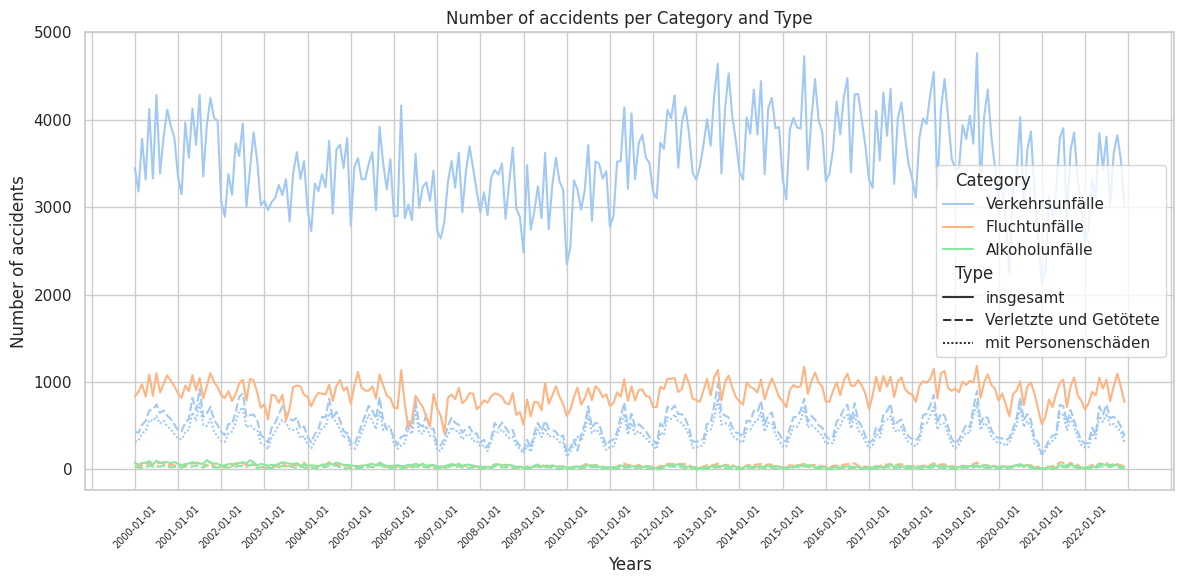

In [541]:
# Creating a plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, ax=ax, x = 'MonthYear', y="Value", hue = 'Category', hue_order = ["Verkehrsunfälle", "Fluchtunfälle","Alkoholunfälle"], style = "Type")

# Set the title and labels
plt.xlabel("Years")
plt.ylabel("Number of accidents")
plt.title("Number of accidents per Category and Type")

# Set the size and format of horisontal x axis
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(size = 7, rotation = 45)
plt.tight_layout()

# Save the image
plt.savefig("Accidents per Category and Type");

## Number of accidents (Value) per Category

Our task is to visualise historically the number of accidents per Category (column1). We have three categories:


1. Verkehrsunfälle
2. Fluchtunfälle
3. Alkoholunfälle



###**The graph below shows the central tendency as well as the absolute values.**

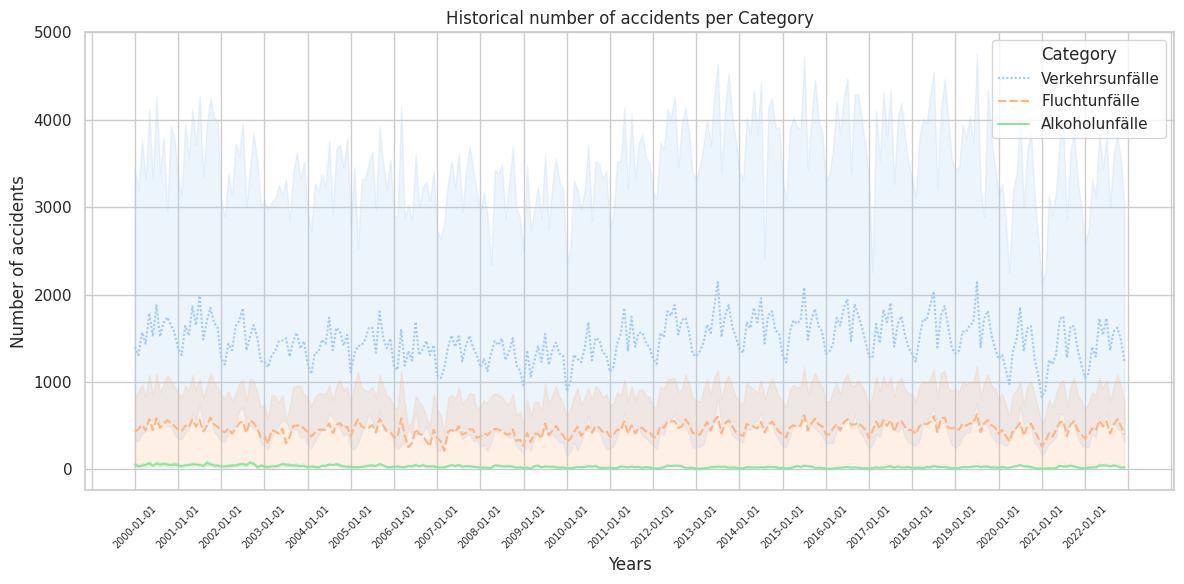

In [542]:
# Creating a plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df, ax=ax, x = 'MonthYear', y="Value", hue = 'Category', hue_order = ["Verkehrsunfälle", "Fluchtunfälle","Alkoholunfälle"], style = "Category")

# Set the title and labels
plt.xlabel("Years")
plt.ylabel("Number of accidents")
plt.title("Historical number of accidents per Category")

# Set the size and format of horisontal x axis
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.xticks(size = 7, rotation = 45)
plt.tight_layout()

# Save the image
plt.savefig("Accidents per Category");

###**Let's have a look at total number of accidents per Year for each Category. I will use "df_Summe" data set for that.**

In [543]:
df_summe.head()

,Category,Type,Year,Month,Value
12,Alkoholunfälle,insgesamt,2022,Summe,493.0
25,Alkoholunfälle,insgesamt,2021,Summe,383.0
38,Alkoholunfälle,insgesamt,2020,Summe,430.0
51,Alkoholunfälle,insgesamt,2019,Summe,434.0
64,Alkoholunfälle,insgesamt,2018,Summe,398.0


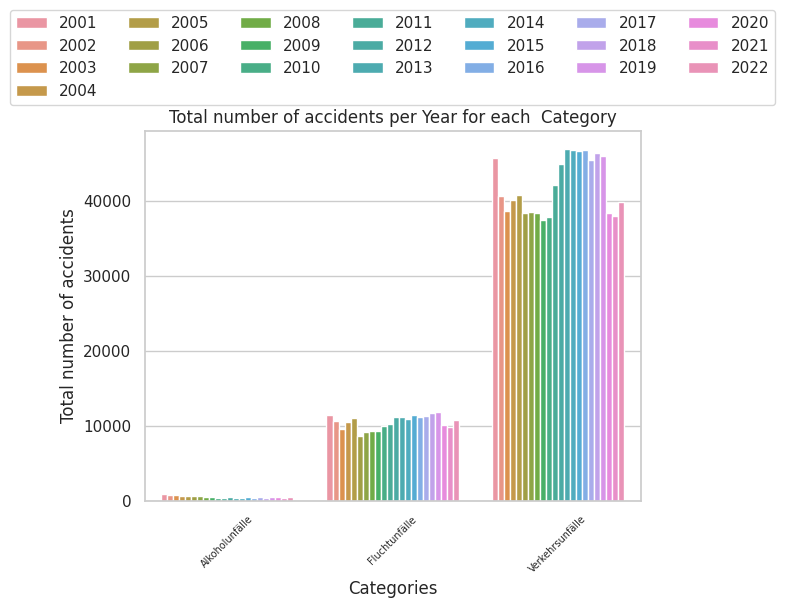

In [544]:
# Creating a subset of total accidents per year for each category
viz_df = df_summe[df_summe["Type"] == 'insgesamt']

# Creating a plot
sns.barplot(x = 'Category', y = 'Value', data = viz_df,  hue = "Year")
plt.figsize=(10, 20)
ax = plt.subplot(111)


# Set the title and labels
plt.xlabel("Categories")
plt.ylabel("Total number of accidents")
plt.title("Total number of accidents per Year for each  Category")

# Set the size and format of horisontal x axis
plt.xticks(size = 7, rotation = 45)
ax.legend(loc=8, bbox_to_anchor=(0.5, 1.05),
          ncol=7, fancybox=True);

# Save the image
plt.savefig("Totalaccidents per Year and Category");

# Assumptions

*  It seems that there is a seasonality in "Verkehrsunfalle" and "Alkoholunfalle".
*    Trends are rather addicative than multiplicative.
* There are rather cycles than a clear trend for "Verkehrsunfalle".
* It might be useful  to create several models for each category or a model that can cope the multioutput multistep problem.

# Models

## Explore the data

 I am going to use the simple Naive for "Alkoholunfälle" "insgesamt" cases as a basemodel.

In [545]:
# Let's have a look at the  " "Alkoholunfälle" "insgesamt"" time series to understand if we need to add a seasonality component.
df_alko = df[(df["Category"] == "Alkoholunfälle") & (df["Type"] == "insgesamt")].drop(columns = ["Category", "Type"], axis = 1)
df_alko.reset_index(drop=True, inplace = True)
df_alko.head(10)

,Year,Month,Value,MonthYear
0,2000,01,78.0,2000-01-01
1,2000,02,53.0,2000-02-01
2,2000,03,73.0,2000-03-01
3,2000,04,78.0,2000-04-01
4,2000,05,96.0,2000-05-01
5,2000,06,57.0,2000-06-01
6,2000,07,99.0,2000-07-01
7,2000,08,77.0,2000-08-01
8,2000,09,84.0,2000-09-01
9,2000,10,83.0,2000-10-01


In [546]:
df_alko.tail(5)

,Year,Month,Value,MonthYear
271,2022,08,44.0,2022-08-01
272,2022,09,56.0,2022-09-01
273,2022,10,49.0,2022-10-01
274,2022,11,28.0,2022-11-01
275,2022,12,32.0,2022-12-01


<Axes: >

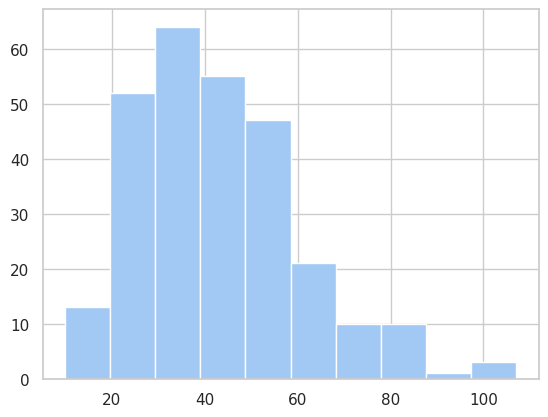

In [547]:
# The target value distribution
df_alko.Value.hist()

The target Value distribution and the additive type of the trend means that we don't need to standartize it. Although we have to periodically check that for the future predictions and if the trend will change, there is a possibility that we will have to add standartization to our model. Also we can use Prophet model, because it works with additive trends.

## Base Model

### Prepare data and train the model

In [548]:
!pip install etna -q

To work with ETNA library I have to standartize columns:

* `timestamp` - datetime with year, month and day
* `target` - our `Value` label for the forecast
*  `segment` - `main` our 'alkohol insgesamt' category

In [549]:
df_etna = df_alko.copy()
df_etna["timestamp"] = pd.to_datetime(df_etna["MonthYear"])
df_etna["target"] = df_etna["Value"]
df_etna.drop(columns=[ "Value", "MonthYear","Month","Year" ], inplace=True)
df_etna["segment"] = "main"
df_etna.head()

,timestamp,target,segment
0,2000-01-01,78.0,main
1,2000-02-01,53.0,main
2,2000-03-01,73.0,main
3,2000-04-01,78.0,main
4,2000-05-01,96.0,main


In ETNA to work with time series there is a special class - TSDataset.

In [550]:
from etna.datasets.tsdataset import TSDataset

df_etna = TSDataset.to_dataset(df_etna)
df_etna.head()

segment,main
feature,target
timestamp,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0


Our frequency is the beginning of the month.

In [551]:
ts = TSDataset(df_etna, freq="MS")

ts.head()

segment,main
feature,target
timestamp,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0


In [552]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 1
num_exogs: 0
num_regressors: 0
num_known_future: 0
freq: MS
         start_timestamp end_timestamp  length  num_missing
segments                                                   
main          2000-01-01    2022-12-01     276            0


In [553]:
ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
main,2000-01-01,2022-12-01,276,0,1,0,0,0,MS


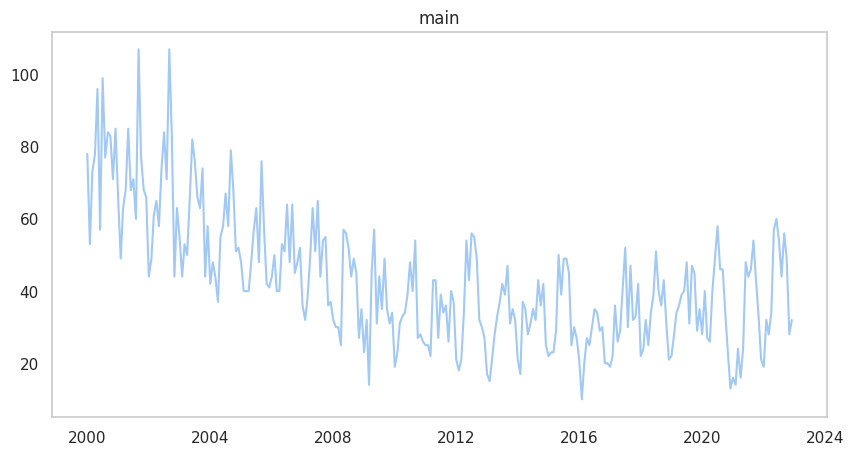

In [554]:
ts.plot()

In [555]:
# Let's split the data
train_ts, test_ts = ts.train_test_split(
    train_start="2000-01-01",
    train_end="2020-12-01",
    test_start="2021-01-01",
    test_end="2021-12-01",
)

In [556]:
train_ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
main,2000-01-01,2020-12-01,252,0,1,0,0,0,MS


In [557]:
HORIZON = 12
from etna.models import NaiveModel

# Fit the model
model1 = NaiveModel(lag=12)
model1.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(future_steps=HORIZON, tail_steps=model1.context_size)
forecast_ts = model1.forecast(future_ts, prediction_size=HORIZON)

/usr/local/lib/python3.10/dist-packages/etna/datasets/tsdataset.py:282: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(


Here we pass prediction_size parameter during forecast because in forecast_ts few first points are dedicated to be a context for NaiveModel.

Now let’s look at a metric and plot the prediction. All the methods already built-in in etna.


In [558]:
from etna.metrics import SMAPE, R2, RMSE, MAE

In [559]:
smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'main': 34.324006085477684}

In [560]:
MAE = MAE()
MAE(y_true=test_ts, y_pred=forecast_ts)

{'main': 9.75}

In [561]:
RMSE = RMSE()
RMSE(y_true=test_ts, y_pred=forecast_ts)

{'main': 11.87083260208258}

In [562]:
R2 = R2()
R2(y_true=test_ts, y_pred=forecast_ts)

{'main': 0.26057646758736297}

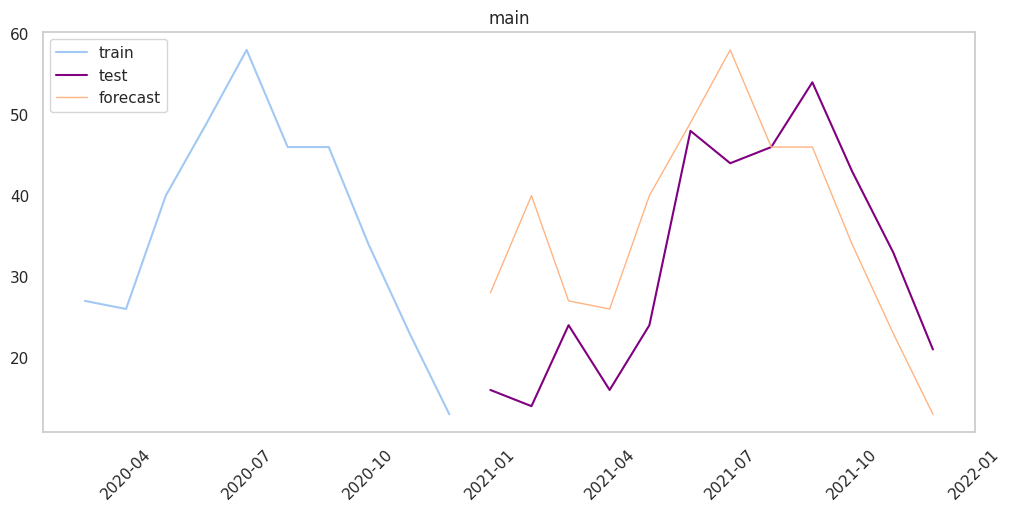

In [563]:
from etna.analysis import plot_forecast
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=10)

### The metrics for the Base model: R2 = 0.26, RMSE = 12, MAE = 9.75

## Prophet model

### Prepare data and train the model

Let's have a look at our data. We need to understand if the trend is additive or multiplicative.

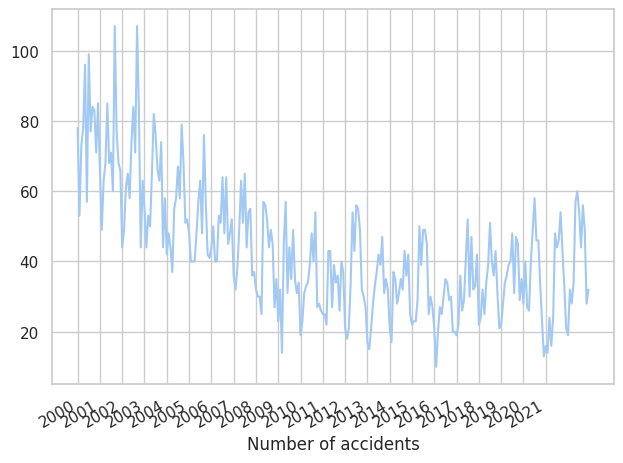

In [564]:
# Let's plot the data incl.test 2021
fig, ax = plt.subplots()

ax.plot(df_alko.MonthYear, df_alko.Value)
ax.set_xlabel("Months and Years")
ax.set_xlabel("Number of accidents")

plt.xticks(np.arange(0, 264, 12),
           [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

fig.autofmt_xdate()
plt.tight_layout();

Our trend is additive. Let's have a look at the character of trend and seasonality.

In [565]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_alko.Value, model = 'additive', period = 12)

<Figure size 1800x800 with 0 Axes>

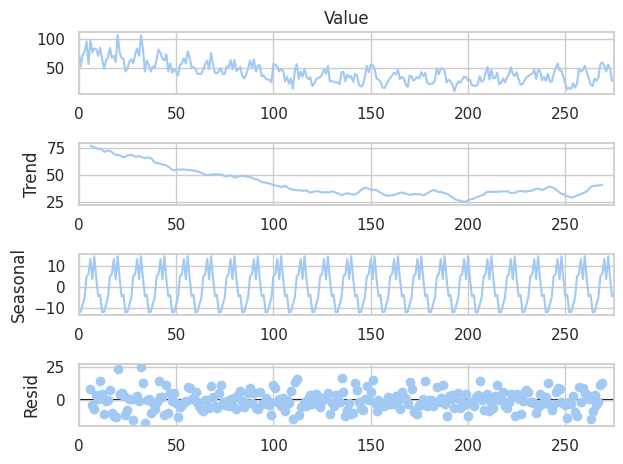

In [566]:
plt.figure(figsize = (18,8))
result.plot()

plt.tight_layout()

We see, that there is a seasonality and some outliers in the beginning.
Also it is importnt to admit that the character of trend changed after 2009. Before 2009 it was going down and was multiplicative. After 2009 the trend goes sideways and look like additive. It makes sense to get rid of data before 2009.

### Working with data after 2009.

In [567]:
df_alko_2009 = df_alko.loc[(df_alko.Year > 2008)].copy()
df_alko_2009.reset_index(drop=True, inplace = True)
df_alko_2009.head(5)

,Year,Month,Value,MonthYear
0,2009,01,23.0,2009-01-01
1,2009,02,32.0,2009-02-01
2,2009,03,14.0,2009-03-01
3,2009,04,45.0,2009-04-01
4,2009,05,57.0,2009-05-01


In [568]:
df_alko_2009.tail(2)

,Year,Month,Value,MonthYear
166,2022,11,28.0,2022-11-01
167,2022,12,32.0,2022-12-01


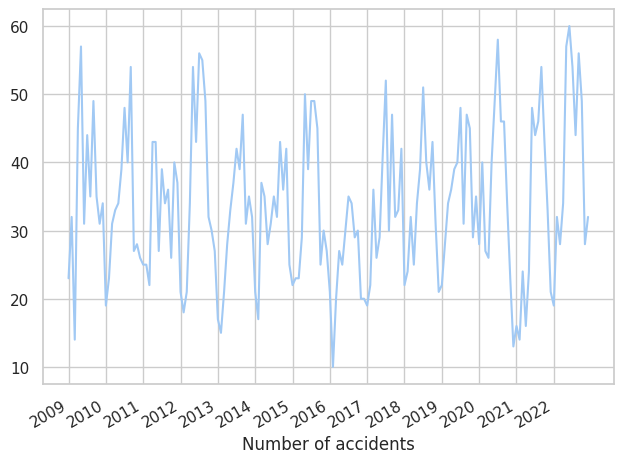

In [569]:
# Let's plot the data from 01/2009
fig, ax = plt.subplots()

ax.plot(df_alko_2009.MonthYear, df_alko_2009.Value)
ax.set_xlabel("Months and Years")
ax.set_xlabel("Number of accidents")

plt.xticks(np.arange(0, 168, 12),
           [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

fig.autofmt_xdate()
plt.tight_layout();

Lets split the data. Our test year will be 2021. Let's highlight it.

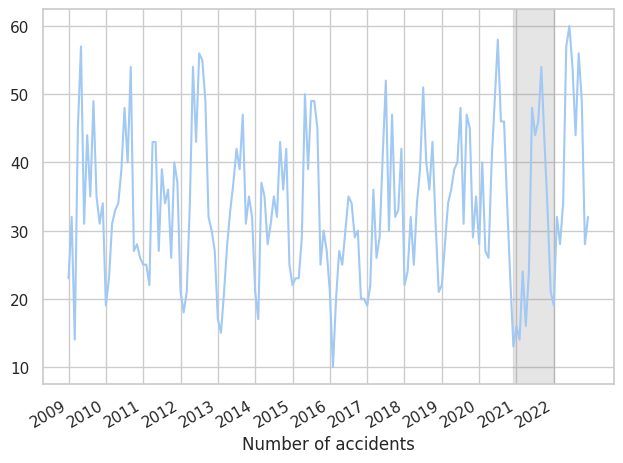

In [570]:
# Let's plot the train and test data
fig, ax = plt.subplots()

ax.plot(df_alko_2009.MonthYear, df_alko_2009.Value)
ax.set_xlabel("Months and Years")
ax.set_xlabel("Number of accidents")
ax.axvspan(143, 156, color = '#808080', alpha = 0.2)

plt.xticks(np.arange(0, 168, 12),
           [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

fig.autofmt_xdate()
plt.tight_layout();

In [571]:
# Let's split the data
df_alko_2009 = df_alko_2009.loc[(df_alko_2009.Year < 2022)].copy()
df_alko_2009_train = df_alko_2009[:-12]
df_alko_2009_test = df_alko_2009[-12:]

In [572]:
df_alko_2009_train.head()

,Year,Month,Value,MonthYear
0,2009,01,23.0,2009-01-01
1,2009,02,32.0,2009-02-01
2,2009,03,14.0,2009-03-01
3,2009,04,45.0,2009-04-01
4,2009,05,57.0,2009-05-01


In [573]:
len(df_alko_2009_test)

12

Let's prepare data for the prophet model.

In [574]:
# It should contain 2 columns: ds for the time series analysis and y for the target variable.
df_prophet = df_alko_2009_train.drop(columns=["Year", "Month"], axis = 1)

In [575]:
# Rename the columns
df_prophet.rename(columns = {"MonthYear":"ds","Value":"y"}, inplace = True)

In [576]:
# Check if the ds column in a correct datetime format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
df_prophet.tail()

,y,ds
139,46.0,2020-08-01
140,46.0,2020-09-01
141,34.0,2020-10-01
142,23.0,2020-11-01
143,13.0,2020-12-01


In [577]:
# Let's update the indexes
df_prophet.index = range(144)

Let's set the Prophet model

In [578]:
model = Prophet(growth = 'linear',n_changepoints=100, yearly_seasonality= True, daily_seasonality=False, weekly_seasonality=False, holidays = None , seasonality_mode  = 'additive', seasonality_prior_scale  = 15, holidays_prior_scale  = 10, changepoint_prior_scale = 0.08, stan_backend = None)
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1zgyzkn/f535ml10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1zgyzkn/rnur0puq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87686', 'data', 'file=/tmp/tmpf1zgyzkn/f535ml10.json', 'init=/tmp/tmpf1zgyzkn/rnur0puq.json', 'output', 'file=/tmp/tmpf1zgyzkn/prophet_modelqyiuii2x/prophet_model-20231205133040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [579]:
forecast = model.make_future_dataframe(periods=12, freq='MS')
forecast.tail()

,ds
151,2021-08-01
152,2021-09-01
153,2021-10-01
154,2021-11-01
155,2021-12-01


In [580]:
forecast_1 = model.predict(forecast)
forecast_1[["ds", "yhat", "yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2021-08-01,40.474185,31.939731,48.899013
152,2021-09-01,45.739321,37.559621,54.637244
153,2021-10-01,34.779455,26.018710,43.016062
154,2021-11-01,32.783668,23.736257,41.428537
155,2021-12-01,30.137059,21.811469,38.509017


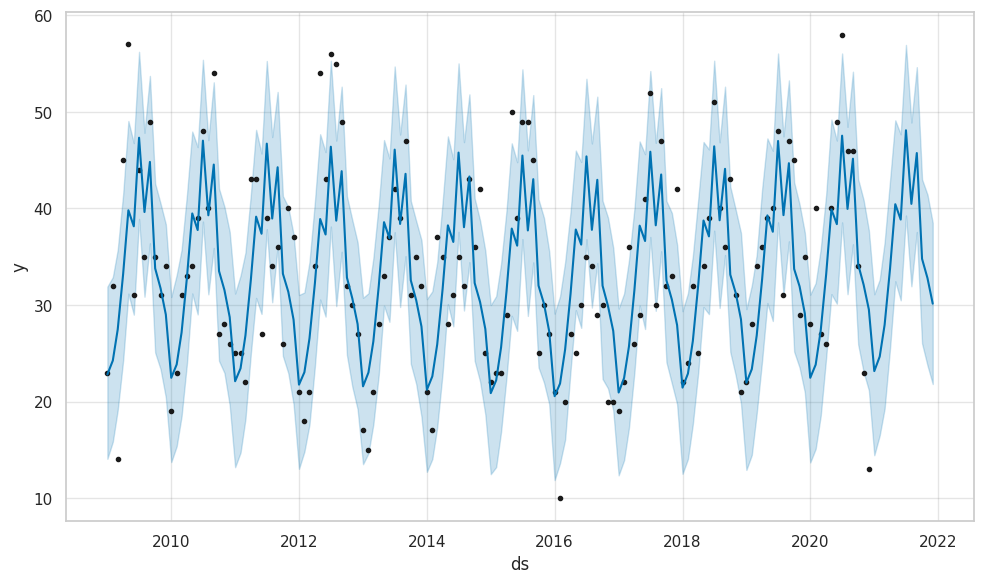

In [581]:
fig_1 = model.plot(forecast_1)

In [582]:
# Calculate MAE and RMSE between expected df_alko_2009_test and predicted values for 2021

y_true = df_alko_2009_test["Value"].values
y_pred = forecast_1['yhat'][-12:].values
mae_1 = mean_absolute_error(y_true, y_pred)
rmse_1 = mean_squared_error(y_true, y_pred, squared=False)
r2_1 = r2_score(y_true.astype(int), y_pred.astype(int))

print('MAE: %.3f' % mae_1)
print('RMSE: %.3f' % rmse_1)
print('R2 Score: %.3f' % r2_1)

MAE: 8.381
RMSE: 9.646
R2 Score: 0.519


We see that we have an outlier (too small value) in the beginning of 2016 year. and too big value in the middle of 2020. Let's find them and change to the value that Prophet suggests.

In [583]:
df_prophet[(df_prophet["ds"] >= "2020-06-01") & (df_prophet["ds"] <= "2020-08-01")]

,y,ds
137,49.0,2020-06-01
138,58.0,2020-07-01
139,46.0,2020-08-01


In [584]:
df_prophet[(df_prophet["ds"] >= "2016-01-01") & (df_prophet["ds"] <= "2016-03-01")]

,y,ds
84,21.0,2016-01-01
85,10.0,2016-02-01
86,20.0,2016-03-01


We see them on 2016-02-01 and 2020-07-01. Let's change them to the lower and upper values that the model suggests.

In [585]:
# The value to change lower outlier
forecast_1[["ds","yhat", "yhat_lower"]][(forecast_1["ds"] == "2016-02-01")]

,ds,yhat,yhat_lower
85,2016-02-01,21.862003,13.611818


In [586]:
# The value to change upper outlier
forecast_1[["ds","yhat", "yhat_upper"]][(forecast_1["ds"] == "2020-07-01")]

,ds,yhat,yhat_upper
138,2020-07-01,47.53709,56.049532


In [587]:
df_prophet.loc[85, ['y']] = 21
df_prophet.loc[138, ['y']] = 48

df_prophet_upd = df_prophet.copy()
df_prophet_upd[(df_prophet_upd["ds"] =="2016-01-01") | (df_prophet_upd["ds"] == "2020-07-01")]


,y,ds
84,21.0,2016-01-01
138,48.0,2020-07-01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1zgyzkn/7rf8ux7j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1zgyzkn/kzfm213t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91416', 'data', 'file=/tmp/tmpf1zgyzkn/7rf8ux7j.json', 'init=/tmp/tmpf1zgyzkn/kzfm213t.json', 'output', 'file=/tmp/tmpf1zgyzkn/prophet_modelok2b1a1j/prophet_model-20231205133041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


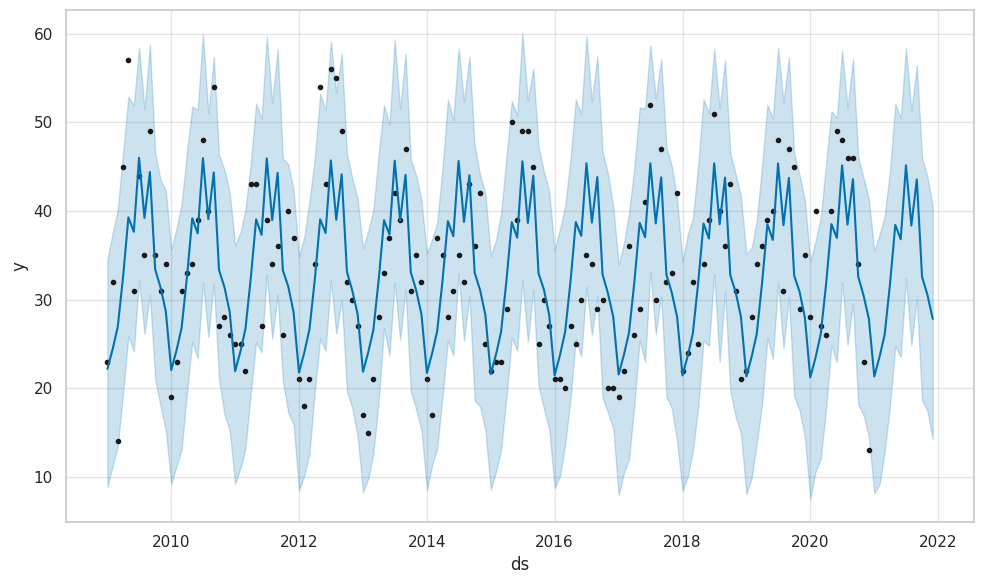

In [588]:
model2 = Prophet(growth = 'linear',n_changepoints=30, yearly_seasonality= True, daily_seasonality=False, weekly_seasonality=False, holidays = None , seasonality_mode  = 'additive',interval_width=0.95, seasonality_prior_scale  = 10, holidays_prior_scale  = 10, changepoint_prior_scale = 0.04, stan_backend = None)
model2.fit(df_prophet_upd)
forecast_upd = model2.make_future_dataframe(periods=12, freq='MS')
forecast_2 = model2.predict(forecast_upd)
fig_3 = model2.plot(forecast_2)

In [589]:
forecast_2[["ds", "yhat", "yhat_lower","yhat_upper"]].tail(12)


,ds,yhat,yhat_lower,yhat_upper
144,2021-01-01,21.321817,8.133138,35.496721
145,2021-02-01,23.626216,9.192991,37.423866
146,2021-03-01,26.038545,12.829657,39.401492
147,2021-04-01,31.803249,18.055765,44.629485
148,2021-05-01,38.441292,24.783008,52.124607
149,2021-06-01,36.816490,23.509774,50.496148
150,2021-07-01,45.158637,32.416253,58.392665
151,2021-08-01,38.368604,24.855173,51.292986
152,2021-09-01,43.571183,30.075383,56.458806
153,2021-10-01,32.576711,18.644866,46.049902


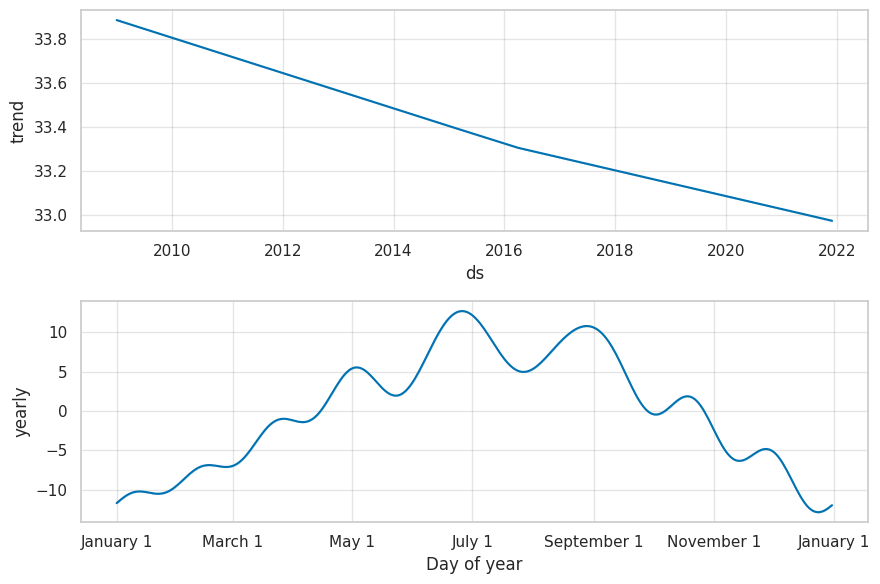

In [590]:
fig_4 = model2.plot_components(forecast_2)

 Calculate the error

In [591]:
# Calculate MAE and RMSE between expected df_alko_2009_test and predicted values for 2021

y_true = df_alko_2009_test["Value"].values
y_pred = forecast_2['yhat'][-12:].values
mae_2 = mean_absolute_error(y_true, y_pred)
rmse_2 = mean_squared_error(y_true, y_pred, squared=False)
r2_2 = r2_score(y_true.astype(int), y_pred.astype(int))

print('MAE: %.3f' % mae_2)
print('RMSE: %.3f' % rmse_2)
print('R2 Score: %.3f' % r2_2)

MAE: 8.113
RMSE: 9.301
R2 Score: 0.551


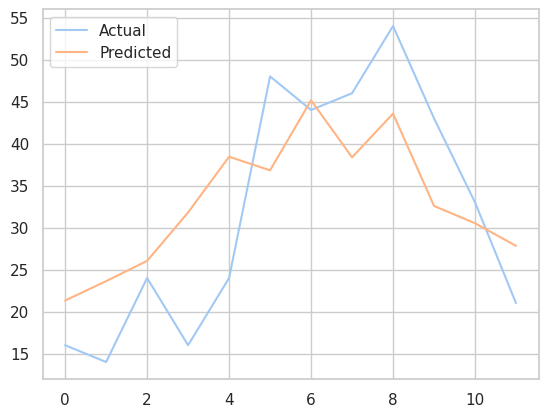

In [592]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Working with all dataset.

Let's have a look how Prophet works on all data. Since it cat catch the change in trend.

Lets prepare the data and build another Prophet model. Our test year will be 2021.

In [593]:
# Let's split the data
df_alko = df_alko.loc[(df_alko.Year < 2022)].copy()
df_alko_train = df_alko[:-12]
df_alko_test = df_alko[-12:]

In [594]:
# It should contain 2 columns: ds for the time series analysis and y for the target variable.
df_prophet_all = df_alko_train.drop(columns=["Year", "Month"], axis = 1)

In [595]:
# Rename the columns
df_prophet_all.rename(columns = {"MonthYear":"ds","Value":"y"}, inplace = True)

In [596]:
# Check if the ds column in a correct datetime format
df_prophet_all["ds"] = pd.to_datetime(df_prophet_all["ds"])
df_prophet_all.tail()

,y,ds
247,46.0,2020-08-01
248,46.0,2020-09-01
249,34.0,2020-10-01
250,23.0,2020-11-01
251,13.0,2020-12-01


In [597]:
# Let's update the indexes
df_prophet_all.index = range(252)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1zgyzkn/0kuevyxr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf1zgyzkn/ot0sf5rv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85317', 'data', 'file=/tmp/tmpf1zgyzkn/0kuevyxr.json', 'init=/tmp/tmpf1zgyzkn/ot0sf5rv.json', 'output', 'file=/tmp/tmpf1zgyzkn/prophet_model0cls_xvy/prophet_model-20231205133047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


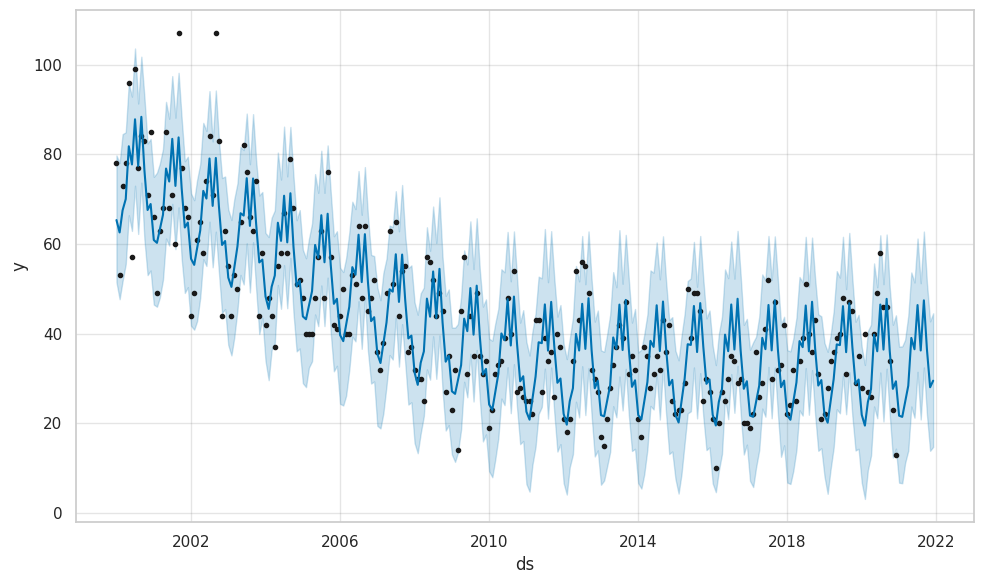

In [598]:
model3 = Prophet(growth = 'linear',n_changepoints=50, yearly_seasonality= True, daily_seasonality=False, weekly_seasonality=False, holidays = None , seasonality_mode  = 'additive',interval_width=0.95, seasonality_prior_scale  = 10, holidays_prior_scale  = 10, changepoint_prior_scale = 0.05, stan_backend = None)
model3.fit(df_prophet_all)
forecast_upd = model3.make_future_dataframe(periods=12, freq='MS')
forecast_3 = model3.predict(forecast_upd)
fig_5 = model3.plot(forecast_3)

The Prophet model caught the trend. Let's have a look at errors.

In [599]:
# Calculate MAE and RMSE between expected df_alko_test and predicted values for 2021

y_true = df_alko_test["Value"].values
y_pred = forecast_3['yhat'][-12:].values
mae_3 = mean_absolute_error(y_true, y_pred)
rmse_3 = mean_squared_error(y_true, y_pred, squared=False)
r2_3 = r2_score(y_true.astype(int), y_pred.astype(int))

print('MAE: %.3f' % mae_3)
print('RMSE: %.3f' % rmse_3)
print('R2 Score: %.3f' % r2_3)

MAE: 7.627
RMSE: 8.583
R2 Score: 0.616


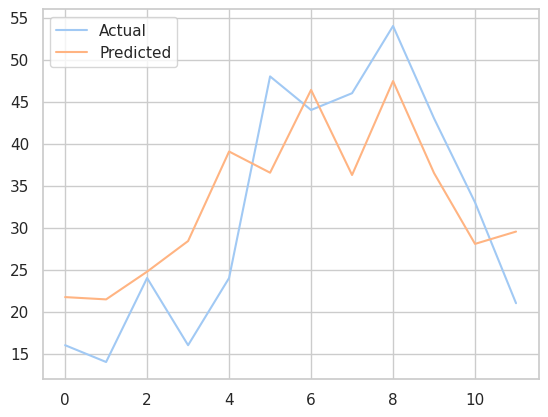

In [600]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Choose model for production

Let's compare the models and choose the one.


In [601]:
### The metrics for the Base model:
R2 = 0.26
RMSE = 12
MAE = 9.75

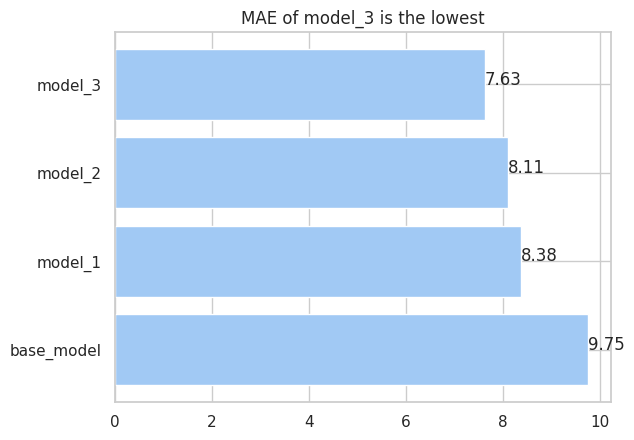

In [602]:
# Plot for MAE
x = ["base_model","model_1", "model_2", "model_3"]
y = [MAE, mae_1.round(2), mae_2.round(2), mae_3.round(2)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

plt.title("MAE of model_3 is the lowest");

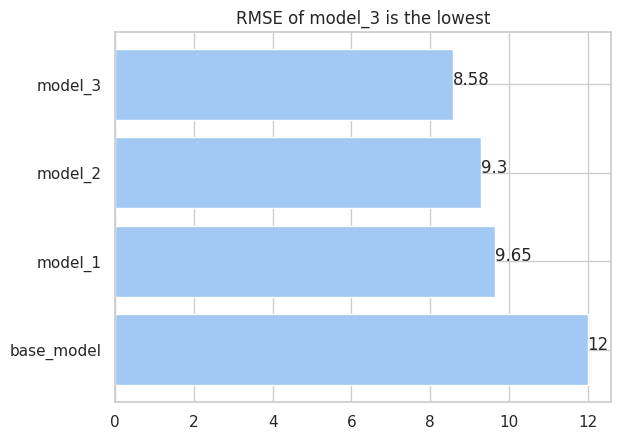

In [603]:
# Plot for RMSE
x = ["base_model", "model_1", "model_2", "model_3"]
y = [RMSE, rmse_1.round(2), rmse_2.round(2), rmse_3.round(2)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

plt.title("RMSE of model_3 is the lowest");

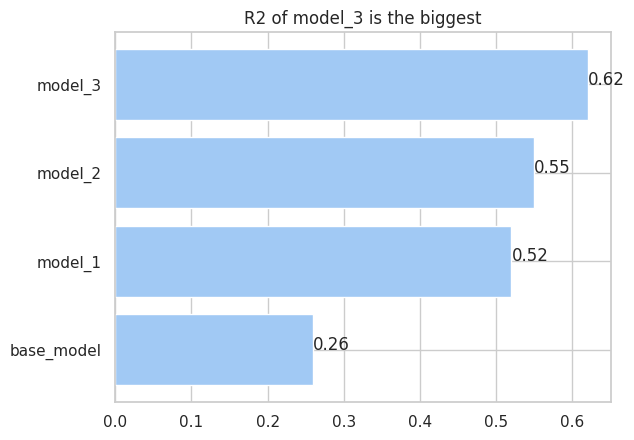

In [604]:
# Plot for R2
x = ["base_model", "model_1", "model_2", "model_3"]
y = [R2, r2_1.round(2), r2_2.round(2), r2_3.round(2)]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

plt.title("R2 of model_3 is the biggest");

### Resume: Model_3 is winning with metrics: R2 = 0.62, RMSE = 8.58, MAE = 7.63. Let's dump it.

In [ ]:
# Download data for training
def fit_and_save_model(X_df, y_df, path="model_weights.mw"):
    model =xgb.XGBClassifier(random_state = 42, subsample= 1.0, min_child_weight= 5, max_depth= 4, gamma = 1.5,
colsample_bytree= 1.0)
    model.fit(X_df, y_df)

    test_prediction = model.predict(X_df)
    f1 = f1_score(test_prediction, y_df)
    print(f"Model's f1 score is {f1}")

    with open(path, "wb") as file:
        dump(model, file)

    print(f"Model was saved to {path}")

def load_model_and_predict(df, path="model_weights_2.mw"):
    with open(path, "rb") as file:
        model = load(file)

    prediction = model.predict(df)[0]

In [ ]:
model3 = Prophet(growth = 'linear',n_changepoints=50, yearly_seasonality= True, daily_seasonality=False, weekly_seasonality=False, holidays = None , seasonality_mode  = 'additive',interval_width=0.95, seasonality_prior_scale  = 10, holidays_prior_scale  = 10, changepoint_prior_scale = 0.05, stan_backend = None)
model3.fit(df_prophet_all)
forecast_upd = model3.make_future_dataframe(periods=12, freq='MS')
forecast_3 = model3.predict(forecast_upd)

In [629]:
# Let's test the prediction for January 2021
year = str("2021")
month = str("01")
prediction_data = pd.to_datetime(year +"-"+ month +"-"+"01")
#print(type(prediction_data))
prediction_df = pd.DataFrame({"ds" : [prediction_data]})
forecast_value = model3.predict(prediction_df)['yhat'][0].round()
print(f'The prediction for year {year} and month {month} is {forecast_value}.')

The prediction for year 2021 and month 01 is 22.0.


In [630]:
# Save the model
import pickle
with open('Prophet_cars.pkl', 'wb') as file:
    pickle.dump(model3, file)

In [634]:
# Load the saved model
with open('Prophet_cars.pkl', "rb") as file:
  loaded_model = pickle.load(file)
prediction_df = pd.DataFrame({"ds" : ["2021-01-01"]})
prediction = loaded_model.predict(prediction_df)

print(f"Predicted number of accidents for January 2021: {prediction['yhat'][0].round()}")


Predicted number of accidents for January 2021: 22.0
